In [1]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

sns.set(style="whitegrid")

In [2]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
my_vars_x = ['bedrooms', 'waterfront', 'yr_built', 'sqft_above','sqft_lot']
my_vars = ['bedrooms', 'waterfront', 'yr_built', 'sqft_above','sqft_lot', 'price' ]
X = data[ my_vars_x]
Y = data['price']



X.head()

,bedrooms,waterfront,yr_built,sqft_above,sqft_lot
0,3.0,0,1955,1340,7912
1,5.0,0,1921,3370,9050
2,3.0,0,1966,1930,11947
3,3.0,0,1963,1000,8030
4,4.0,0,1976,1140,10500


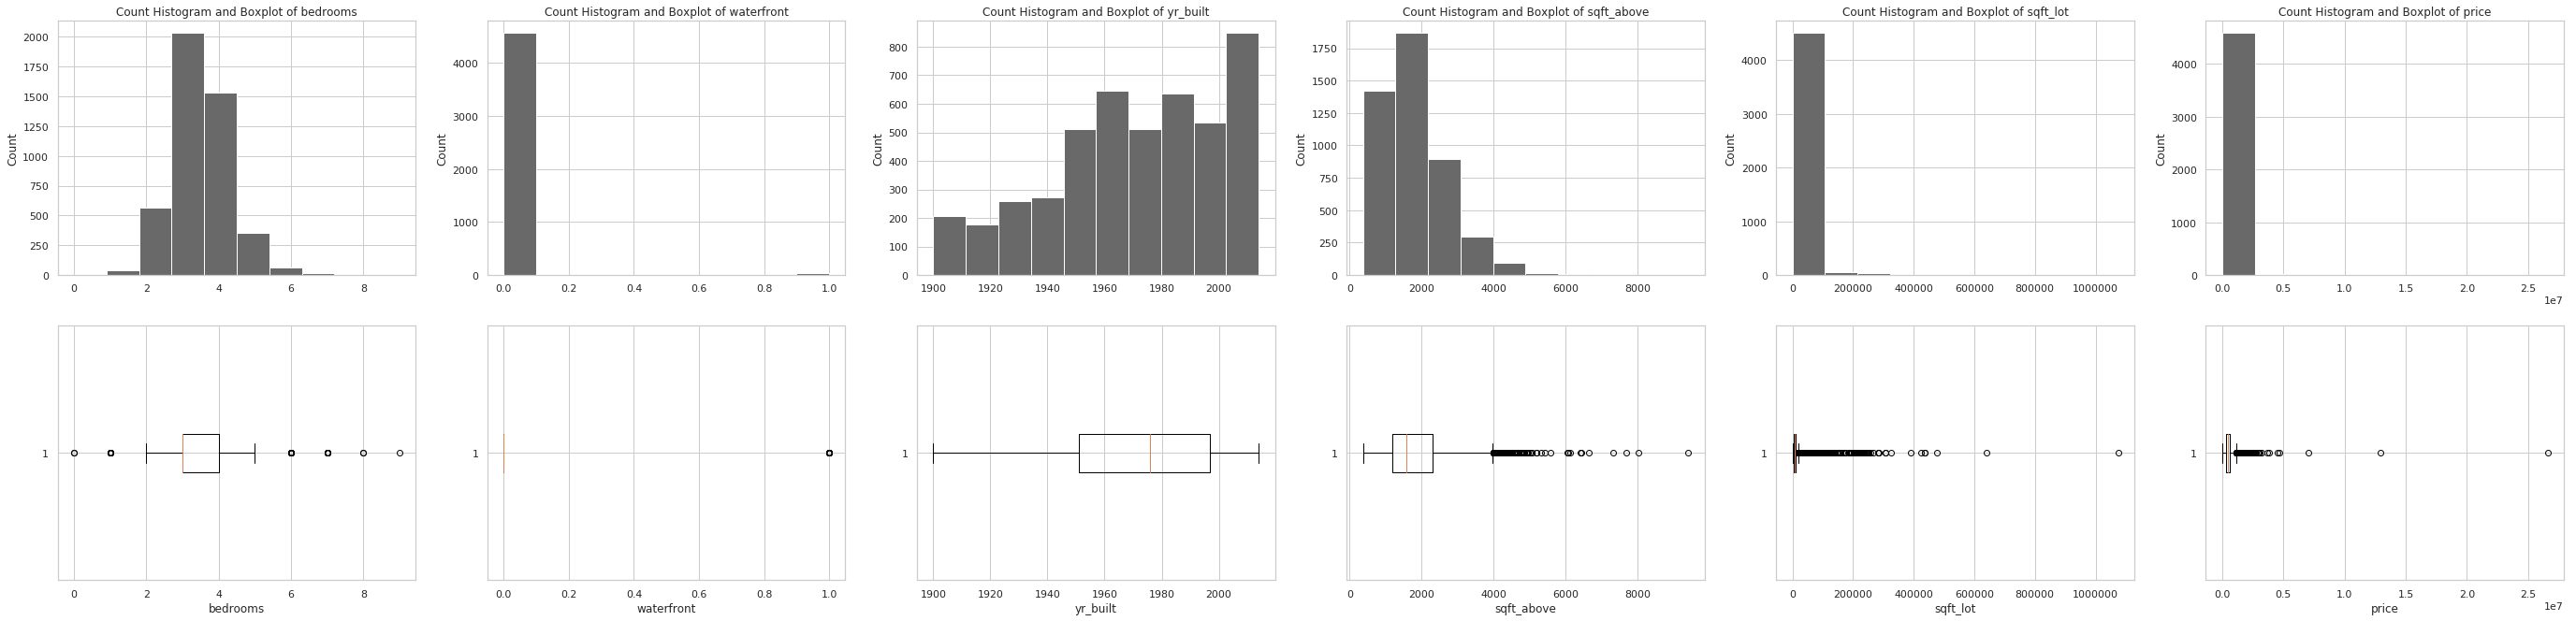

In [4]:
cols = my_vars
n_cols = len( cols )

fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(8*n_cols,11))

for ind, col in enumerate(cols):
    axes[0][ind].hist( data[col].dropna().values, color="DimGray" )
    axes[0][ind].set_ylabel("Count")
    axes[0][ind].set_title("Count Histogram and Boxplot of {:}".format(col))

    axes[1][ind].boxplot(data[col].dropna().values, vert=False, showfliers=True)
    axes[1][ind].set_xlabel(col)
plt.show()
plt.close()



The above chart is best viewed in a separate window.

In [5]:
#Bedrooms
col = 'bedrooms'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: bedrooms
count    4600.000000
mean        3.400870
std         0.908848
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: bedrooms, dtype: float64



The variable for bedrooms appears to be roughly normally distributed. Three or four bedrooms appears to be the norm. There are some strange outliers, like at least one 9 room mansion, and a zero bedroom. Maybe the zero bedroom is a typo

In [6]:
col = 'waterfront'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))

Variable: waterfront
count    4600.000000
mean        0.007174
std         0.084404
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: waterfront, dtype: float64



Waterfront is pretty predictable, where only 0.7% of the homes have water front property. That's only 33 homes, and might not be a large enough sample size to draw many meaningful conclusions.

In [7]:
col = 'yr_built'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))
print("Value Counts:\n{:}" .format( data[col].value_counts().head(10)) )

Variable: yr_built
count    4600.000000
mean     1970.786304
std        29.731848
min      1900.000000
25%      1951.000000
50%      1976.000000
75%      1997.000000
max      2014.000000
Name: yr_built, dtype: float64

Value Counts:
2006    111
2005    104
2007     93
2004     92
1978     90
2003     89
2008     89
1967     82
1977     80
2014     78
Name: yr_built, dtype: int64


Overall, there is growth in the number of house built per year. 50% of the houses were build after 1976, where the first one was built in 1900. Well, it's likely that 1900 is an approximation because they don't know how old the house is, that might need to be taken into account in the model somehow.

Anyway,there seem to be periods of high growth interspersed. While most of the 'top spots' for homes built are in the 2000's, there are a couple in the 60's and 70's. 

In [8]:
col = 'sqft_above'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))


Variable: sqft_above
count    4600.000000
mean     1827.265435
std       862.168977
min       370.000000
25%      1190.000000
50%      1590.000000
75%      2300.000000
max      9410.000000
Name: sqft_above, dtype: float64



The Square Feet Above appears to be approximately log normally distributed. We'll probably have to model this one as log(sqft_above).  

Half of the house has above/below 1590 sqft above ground. while there is one tiny home with only 370 and a mansion with 9410.  

In general, there is going to be a lot of correlation among sqft_lot, \_above, \_basement, & \_living. We'll just have to see which one is the best fit and use it for our model.

In [9]:
col = 'sqft_lot'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))


Variable: sqft_lot
count    4.600000e+03
mean     1.485252e+04
std      3.588444e+04
min      6.380000e+02
25%      5.000750e+03
50%      7.683000e+03
75%      1.100125e+04
max      1.074218e+06
Name: sqft_lot, dtype: float64



Lot size is a pretty strange distribution. Maybe log normal? maybe pareto? 
The smallest lot is only 638 sqft, while the largest is over 1 million. However, most lots (50%) are in the 5,000 to 7,700 sqft range.  

Maybe the lot size will be more independent of the other sqft measures than I thought.

In [10]:
col = 'price'
print("Variable: {:}\n{:}\n".format(col, data[col].describe()))


Variable: price
count    4.600000e+03
mean     5.519630e+05
std      5.638347e+05
min      0.000000e+00
25%      3.228750e+05
50%      4.609435e+05
75%      6.549625e+05
max      2.659000e+07
Name: price, dtype: float64



Price seems to be distributed pretty similarly to lot size. That doesn't say much about the correlation, but it's an interesting coincidence.  

The cheapest house was supposedly zero dollars, so I bet that's a typo. The most expensive was over 26 million. However, half over the homes fall between \\$323k and \\$655k

now for...
# Plots!  

In [11]:
##Code from previous lab
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)
    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1, showfliers=False)
    #eda.restyle_boxplot( patch)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()
    
def correlation(data, x, y):
    print("Correlation coefficients:")
    print( "r   =", stats.pearsonr(data[x], data[y])[0])
    print( "rho =", stats.spearmanr(data[x], data[y])[0])
    
def describe_by_category(data, numeric, categorical):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    print(grouped_y)
    
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=True):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

## Continuous Variables

yr_built


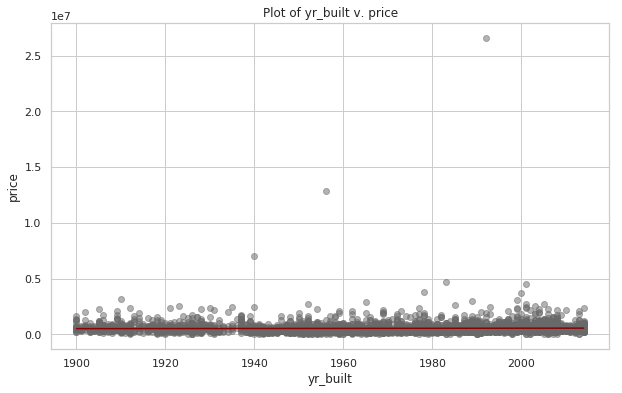

sqft_above


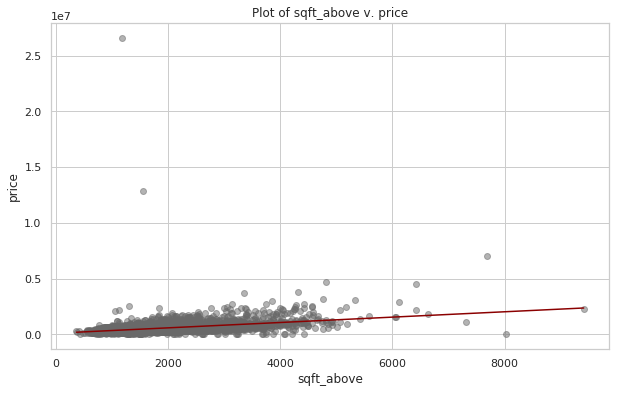

sqft_lot


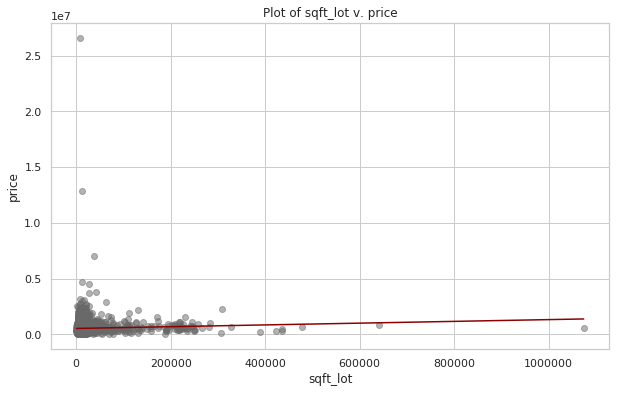

In [12]:
cont_cols = ['yr_built', 'sqft_above', 'sqft_lot']
for col in cont_cols:
    print(col)
    lowess_scatter(data, col, 'price')

### Year Built vs Price

Year built vs price seems to have little correlation. Or maybe that's just because there are a few outliers pulling up the graph.  
The trend I was expecting to see here might be captured in the "year renovated" dataset

### Sqft_above vs Price  

Appears to have some Heteroscedasticity, where variance seems to be creeping up as a result of increased square footage. This might be fixed by log transformation.

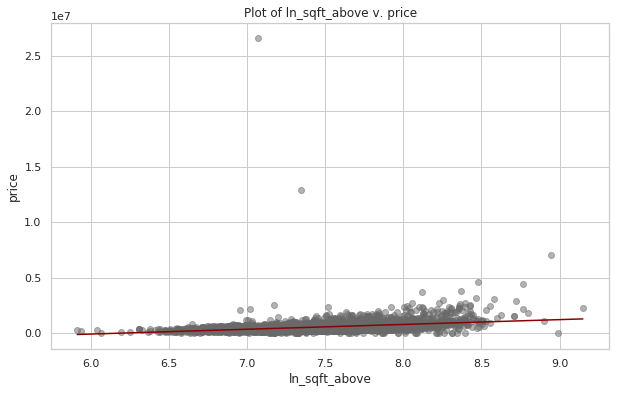

In [13]:
col = 'ln_sqft_above'
data[col] = np.log(data['sqft_above'])
lowess_scatter(data, col, 'price')

Still has some heteroscedasitcity. Maybe the price variable could be redfined to $/sqft_livable (this is a common metric in realty)

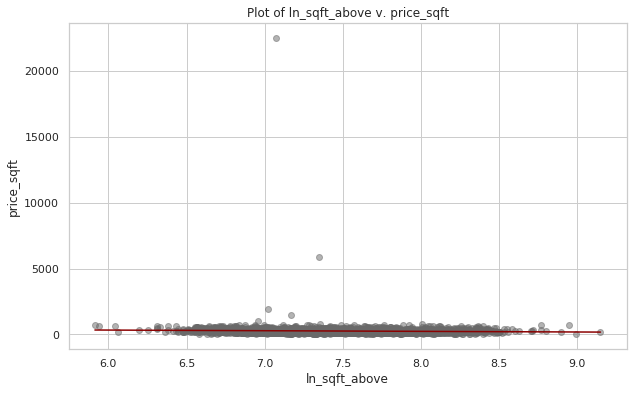

In [14]:
col = 'price_sqft'
data[col] = data['price'] / data['sqft_living']
lowess_scatter(data, 'ln_sqft_above', 'price_sqft')

So much better for homoscedasiticity, although my linear relationship is now lost.  This is probably find, as these two values are highly correlated.  
I might need to let everyone else know to compare against a 'transformed' price

### Sqft_lot vs price  
Now this plot is a little strange. There are some very high prices for some very small lots. This is likely zipcode dependent, as this could be in a dense city, or a very desirable part of town.   
Lets also log the lot and plot against the price per sqft

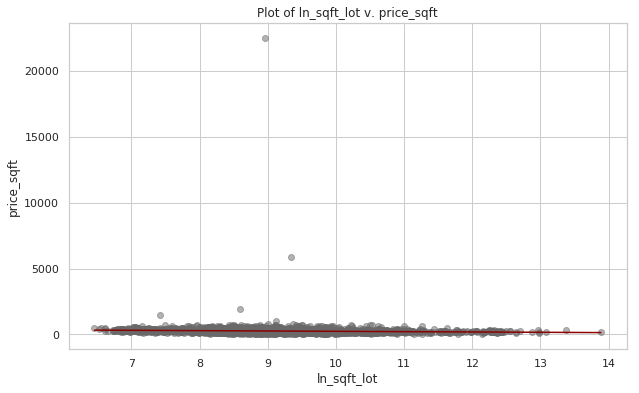

In [15]:
col = 'ln_sqft_lot'
data[col] = np.log( data['sqft_lot'] )
lowess_scatter(data, col, 'price_sqft')

Some outliers still exist, and I've also seemed to rid any linear relationship.

## Discrete Variables

bedrooms


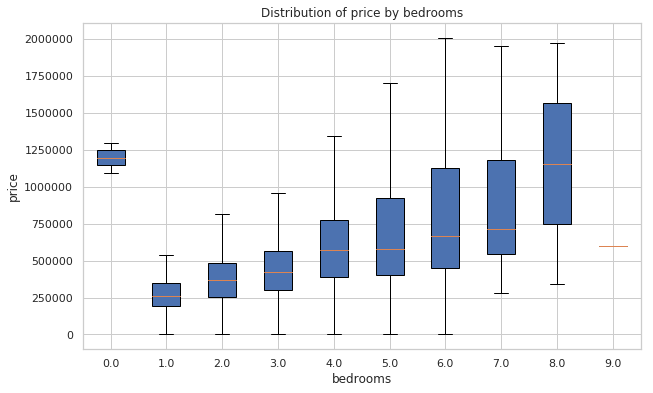

waterfront


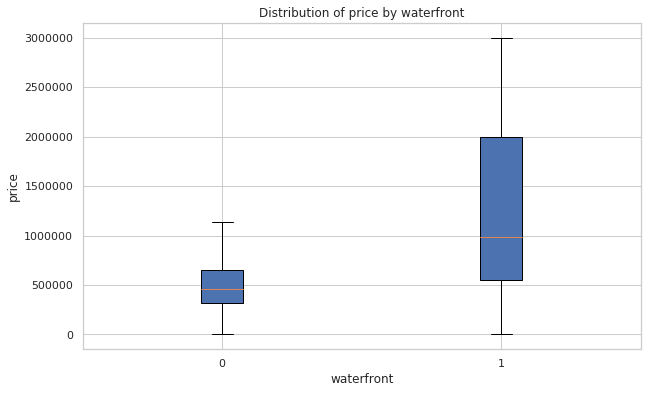

In [16]:
cat_cols = ['bedrooms', 'waterfront']

for col in cat_cols:
    print(col)
    multiboxplot(data,'price',col)

### Bedrooms vs price  

With the exception of the zero bedroom house, and 9 bedroom house. There is a clear positive trend between number of bedrooms and price. Unfortunately, the variance of price also increases. Lets compare it against price per sqft living

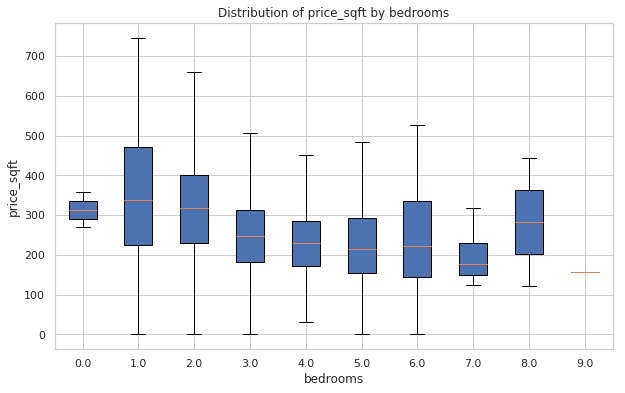

In [17]:
multiboxplot(data,'price_sqft','bedrooms')

I honestly don't know if this is any more informative. There is clearly a correlation between livable square feet and the number of bedrooms, but I wasn't expecting the price per sqft to go *down* as a result of adding bedrooms.

### Bedrooms vs Living Space (for fun)

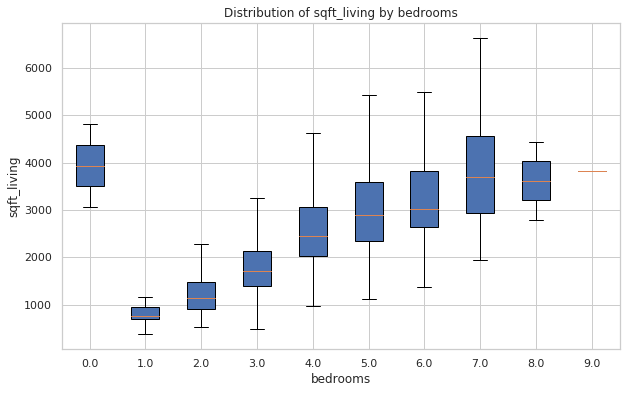

In [18]:
multiboxplot(data,'sqft_living','bedrooms')

### Waterfront vs price  

It seems obvious that the average value of a waterfront house would be higher than those without. The data bears that out. However, it is worth remember that there were only 33 examples of waterfront houses, so it's difficult to draw too many conclusions from this.